<a href="https://colab.research.google.com/github/sqx27/AQS/blob/main/Alex_Song_FM5252_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Alex Song FM5252 HW3
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy

#create 2 implied volatlity finder using different method

#calculate option price at estimate sigma
def option_value(S,K,r,t,sigma):
  d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
  d2 = (np.log(S/K)+(r-0.5*sigma**2)*t)/(sigma*np.sqrt(t))
  call = (S * norm.cdf(d1,0,1) - K*np.exp(-r*t) * norm.cdf(d2,0,1))
  put = (K*np.exp(-r*t) * norm.cdf(-d2,0,1) - S * norm.cdf(-d1,0,1))
  return call,put

#calculate vega using given parameter
def vega(S,K,r,t,sigma):
  d1 = (np.log(S/K)+(r+0.5*sigma**2)*t)/(sigma*np.sqrt(t))
  vega = S * norm.cdf(d1,0,1) * np.sqrt(t)
  return vega


In [7]:
#apply Newton's Method
def Newton(S,K,t,r,op,type): #type=0,call; type=1,put
  size = 10000
  est_sigma = .2
  for i in range(size):
    est_sigma -= (option_value(S,K,r,t,est_sigma)[type] - op) / vega(S,K,r,t,est_sigma)

  return est_sigma

print('Implied voltality for call option is ',Newton(100,100,1,0.05,5,0),
      '\nImplied voltality for put option is ',Newton(100,100,1,0.05,5,1))

Implied voltality for call option is  0.035384777344651334 
Implied voltality for put option is  0.1846818322014981


In [6]:
#2 Using Bisection Method

def Bis(S,K,t,r,op,type): #type=0,call; type=1,put
  est_op = 0
  upper = 100
  lower = 0
  est_sigma = (upper + lower)/2

  while abs(op - est_op) > 0.0001:
    est_op = option_value(S,K,r,t,est_sigma)[type]
    if op - est_op> 0:
      lower = est_sigma
      est_sigma = (est_sigma + upper)/2
    else:
      upper = est_sigma
      est_sigma = (est_sigma + lower)/2

  return est_sigma

print('Implied voltality for call option is ',Bis(100,100,1,0.05,5,0),
      '\nImplied voltality for put option is ',Bis(100,100,1,0.05,5,1))

Implied voltality for call option is  0.03542900085449219 
Implied voltality for put option is  0.1846805214881897


In [53]:
#Part 2
K = np.linspace(100,150,100)
# S0=100 r=5% T=1 Op=5
def getimpvol(S,K,t,r,op,type):
  imp_vol = np.zeros(len(K))
  for i in range(len(K)):
    imp_vol[i] = Newton(S,K[i],t,r,op,type)
  
  return imp_vol


In [54]:
imp_vols = getimpvol(100,K,1,.05,5,0)

In [55]:
imp_vols,K

(array([0.03538478, 0.05416301, 0.06606895, 0.07581098, 0.08436756,
        0.09214329, 0.09935185, 0.10612247, 0.11254043, 0.11866557,
        0.1245418 , 0.13020256, 0.135674  , 0.14097706, 0.14612881,
        0.15114344, 0.15603286, 0.16080722, 0.16547525, 0.17004452,
        0.17452167, 0.17891254, 0.18322233, 0.18745568, 0.19161675,
        0.1957093 , 0.19973674, 0.20370216, 0.20760841, 0.21145809,
        0.21525358, 0.2189971 , 0.22269069, 0.22633625, 0.22993555,
        0.23349024, 0.23700185, 0.24047184, 0.24390155, 0.24729227,
        0.25064518, 0.25396143, 0.25724209, 0.26048817, 0.26370063,
        0.26688039, 0.27002831, 0.27314522, 0.2762319 , 0.27928911,
        0.28231756, 0.28531793, 0.28829089, 0.29123706, 0.29415704,
        0.29705141, 0.29992072, 0.30276551, 0.30558629, 0.30838355,
        0.31115777, 0.3139094 , 0.3166389 , 0.31934667, 0.32203314,
        0.32469871, 0.32734375, 0.32996864, 0.33257374, 0.33515941,
        0.33772597, 0.34027375, 0.34280308, 0.34

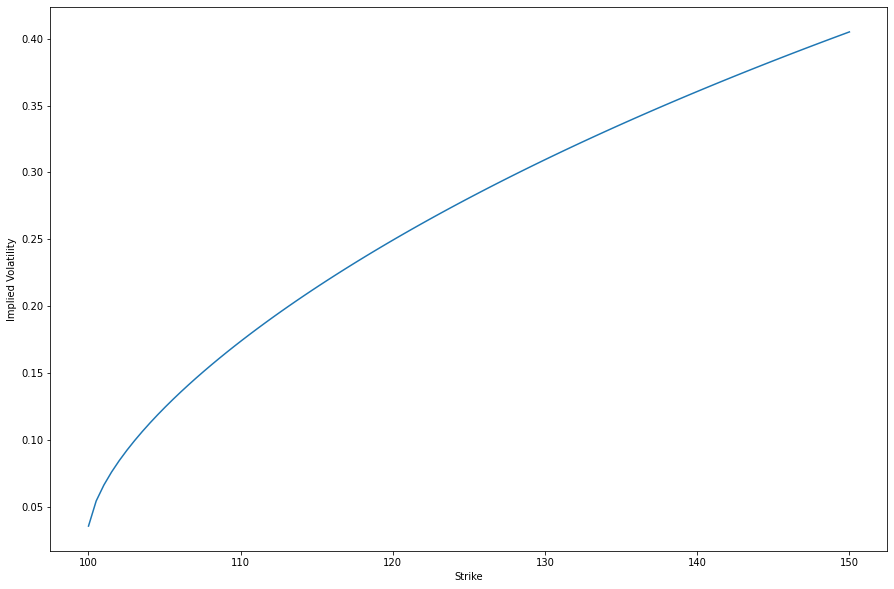

In [59]:
plt.figure(figsize = (15,10))
plt.plot(K, imp_vols)

plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.show()
    

In [ ]:
#vol = a + b * (rho * (K-m) + np.sqrt((K-m)**2+sig**2))

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [51]:
#part 2 Colab with Hong Hu

aapl = yf.Ticker("AAPL")
opt = aapl.option_chain('2022-06-17')
call = opt.calls

def get_vols_skew(ticker, date):
    underly = yf.Ticker(ticker)
    opt = underly.option_chain(date)
    call_data = opt.calls
    put_data = opt.puts
    effective_vol_call = []
    strike_call = []
    effective_vol_put = []
    strike_put = []
    for i in call_data.iterrows():
        if i[1][11] == True and i[1][10] > 0.00005 and i[1][10] < 1.5:

            effective_vol_call.append(i[1][10])
            strike_call.append(i[1][2])

    for i in put_data.iterrows():
        if i[1][11] == True and i[1][10] > 0.00005 and i[1][10] < 1.5:

            effective_vol_put.append(i[1][10])
            strike_put.append(i[1][2])
    current_price = (np.min(strike_put) + np.max(strike_call))/2
    effective_vol = effective_vol_put + effective_vol_call
    strike = strike_put + strike_call
    return effective_vol, strike, current_price

def sviCurve (x, a, b, rho, m,sigma):

    result = a+b*(rho*(x-m)+np.sqrt((x-m)**2 + sigma**2))
    std = np.sqrt(result)
    return std

def sviFit (impliedvol,strikes):
    o = scipy.optimize.curve_fit(sviCurve, strikes, impliedvol, maxfev= 1000000)
    return o

def runfunc_2(ticker,date):
    vol = get_vols_skew(ticker, date)
    underlyprice = vol[2]
    param = sviFit(vol[0], vol[1])[0]
    print("a is ", param[0], ", b is ", param[1], ", rho is " , param[2], ", m is ",param[3], ", sigma is ",param[4])




In [50]:
runfunc_2("AAPL", "2022-06-17")

ValueError: ignored